In [1]:
#data format library
import h5py
#numpy
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# %matplotlib notebook
from sklearn.cluster import KMeans

import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import os
from scipy.integrate import odeint
#change path to where 'manuscript_data' is saved
dir_path = '/home/antonio/Repositories/manuscript_data/'
sys.path.append(dir_path+'/code/utils/')
import stats

# Coarse-grained estimate

In [2]:
f = h5py.File(dir_path+'Lorenz/kinetic_analysis/combined_coarse_tscales_results_3162_clusters.h5','r')
delay_range = np.array(f['delay_range'])
all_timps = np.array(f['timps'])
f.close()
dt=.01

all_tims = ma.masked_invalid(all_timps)
all_timps[all_timps==0]=ma.masked

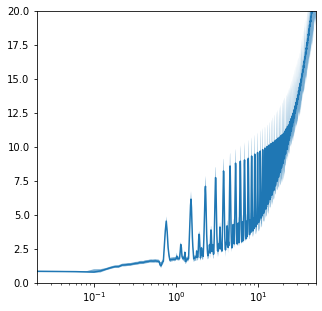

In [3]:
mean = all_timps.mean(axis=0)
cil = np.percentile(all_timps,2.5,axis=0)
ciu = np.percentile(all_timps,97.5,axis=0)
plt.figure(figsize=(5,5))
plt.plot(delay_range*dt,mean)
plt.fill_between(delay_range*dt,cil,ciu,alpha=.6)
plt.xscale('log')
plt.xlim(2*dt,50)
plt.ylim(0,20)
# plt.savefig('coarse_tscales_Lorenz_log_ylim_95_ci.pdf')
plt.show()

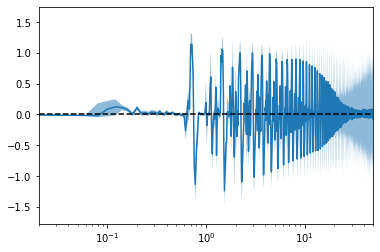

In [4]:
mean = np.diff(all_timps,axis=1).mean(axis=0)
cil = np.percentile(np.diff(all_timps,axis=1),2.5,axis=0)
ciu = np.percentile(np.diff(all_timps,axis=1),97.5,axis=0)

plt.plot(delay_range[:-1]*dt,mean)
plt.fill_between(delay_range[:-1]*dt,cil,ciu,alpha=.5)
plt.xscale('log')
plt.xlim(2*dt,50)
plt.axhline(0,ls='--',c='k')
plt.show()

# Full estimate

In [5]:
n_clusters=3162
f = h5py.File(dir_path+'/Lorenz/kinetic_analysis/combined_kinetic_results_{}_clusters_simpler.h5'.format(n_clusters),'r')
idx_range = np.sort(np.array(list(f.keys()),dtype=int))
delay_range = np.arange(2,6000,2)
all_timps = np.zeros((len(idx_range)-2,len(delay_range),2))
kidx=0
for idx in idx_range:
    if len(list(f[str(idx)].keys()))>0:
        if  np.array(f[str(idx)]['timps']).sum()>0:
            all_timps[kidx] = np.array(f[str(idx)]['timps'])
            kidx+=1
f.close()

In [6]:
all_timps = ma.masked_invalid(all_timps)
all_timps[all_timps==0] = ma.masked

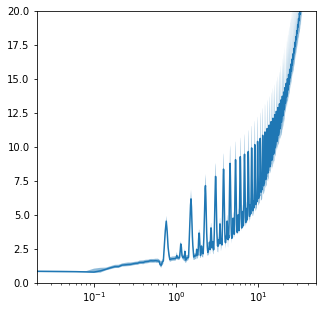

In [7]:
plt.figure(figsize=(5,5))
Lambda2 = 1/all_timps[:,:,0]+ 1/all_timps[:,:,1]
mean = ma.mean(2/Lambda2,axis=0)
cil = np.nanpercentile(ma.filled(2/Lambda2,np.nan),0.5,axis=0)
ciu = np.nanpercentile(ma.filled(2/Lambda2,np.nan),99.5,axis=0)

plt.plot(delay_range*dt,mean)
plt.fill_between(delay_range*dt,cil,ciu,alpha=.5)
plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.02,50)
plt.ylim(0,20)
plt.show()